In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.font_manager as fm
# 글꼴 한국어도 가능하도록 설정
path = '/Library/Fonts/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
prop = fm.FontProperties(fname=path, size=15)
plt.rc('font', family=font_name)

## 데이터 불러오기
데이터를 불러옵니다. 이 데이터는 미리 통합된 데이터를 사용합니다.
A라는 사용자가 사이트를 접속하여 한 행적들이 모두 통합된 데이터입니다.

*데이터가 너무 커서 10000개의 샘플 추출로 진행합니다.

In [10]:
df=pd.read_csv('total_dataset.csv')
test=df[:10000]


# 기본 EDA 수행
1. 기본적인 세션(사용자가 접속을 한 경우)별로 단일 변수들(구매, 페이지 조회, 접속 시간, 지역, 등)에 대한 시각화
2. 구매&단일변수들 간의 관계 파악


순서는 다음과 같습니다.

페이지 조회 -> 접속 시간 -> 접속 기기 유형 -> 접속 지역 -> 데스크탑 유저 -> 상품군

## 1. 구매와 페이지 조회 시각화


1-1. 세션별 페이지 조회 변수 시각화

1-2. 페이지조회와 구매의 관계 파악

## 2. 구매와 세션 접속시간 시각화

2-1. 세션별 세션 접속시간 변수 시각화

2-2. 세션 접속 시간과 구매의 관계 파악

## 3. 구매와 접속 기기유형 시각화
3-1. 세션별 접속 기기유형 변수 시각화

3-2. 접속 기기유형과 구매의 관계 파악

3-3. 기기 유형에 따른 상품 소비 시각화

## 4. 구매와 접속 지역 시각화
4-1. 세션별 접속 지역 변수 시각화

4-2. 접속 지역과 구매의 관계 파악

## 5. 데스크탑 유저의 특징 시각화
5-1. 페이지 조회

5-2. 접속 시간

5-3. 성별

5-4. 연령

5-5. 검색어

## 6. 구매와 상품군 시각화

# 1. 구매와 페이지 조회 시각화
### 1-1. 세션별 페이지 조회 변수 시각화



/home/heemok/.venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['1HoonPinkpungcha'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/heemok/.venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['1HoonPinkpungcha'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


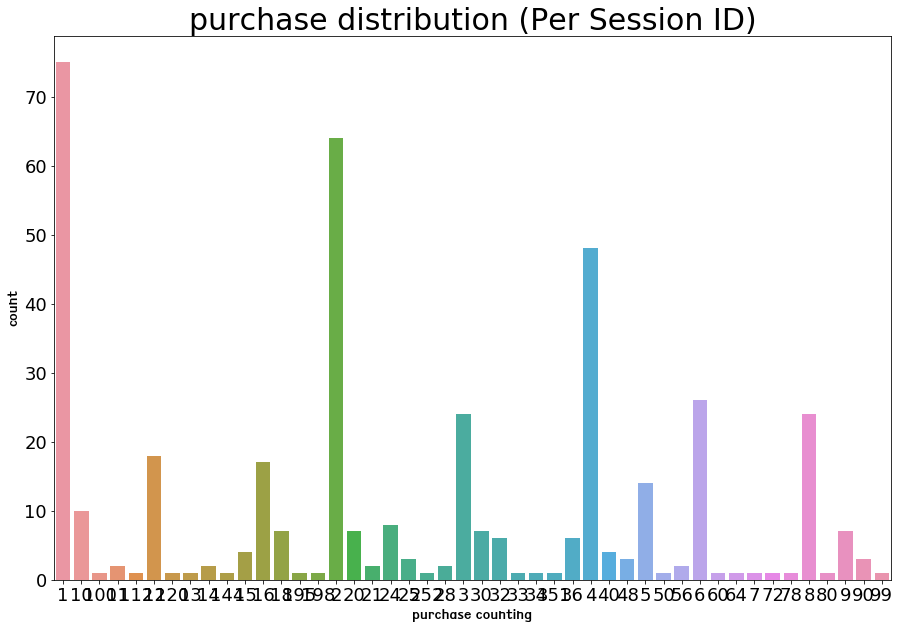

In [4]:
# 세션 ID별 구매 건수 분포
plt.figure(figsize=(15,10))
sns.countplot(sorted(test.groupby('SESS_ID')['PD_BUY_CT'].sum().astype(str), key = lambda x: x if len(x) == 1 else '9' + x))
plt.title('purchase distribution (Per Session ID)', fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('purchase counting', fontsize=18,fontproperties=prop)
plt.ylabel('count', fontsize=18,fontproperties=prop)
plt.show()

- 고객들의 세션마다의 구매량입니다.
- 그래프로 부터 알 수 있는 것
    1. 몇명의 고객들 사이에서 지나치게 구매량이 많은 사람들이 존재한다. 
    2. 이들을 VIP 고객 or abnormal 고객으로 볼 수 있다. 

### 1-2. 페이지조회와 구매의 관계 파악

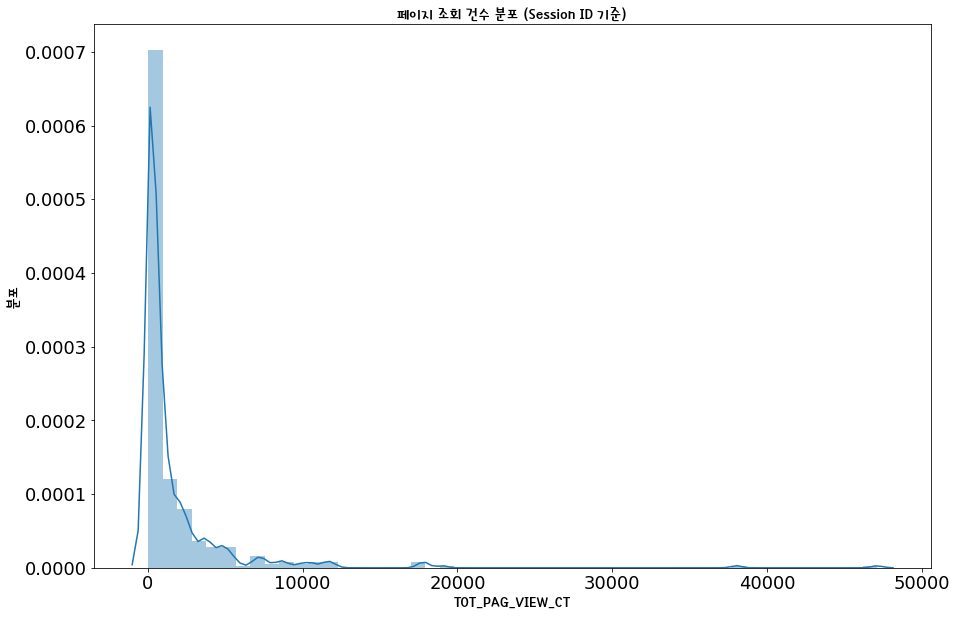

In [5]:
# 세션 ID별 페이지 조회 건수 분포
data = test.groupby('SESS_ID')['TOT_PAG_VIEW_CT'].sum()
plt.figure(figsize = (15,10))
plt.title("페이지 조회 건수 분포 (Session ID 기준)", fontsize=30,fontproperties=prop)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('페이지 조회 건수', fontsize=18,fontproperties=prop)
plt.ylabel('분포', fontsize=18,fontproperties=prop)
sns.distplot(data)
plt.show()

- 분포가 왼쪽으로 쏠린 것으로 보아 대체로 고객들은 페이지의 조회수가 많지 않은 분포를 보이고 있습니다.

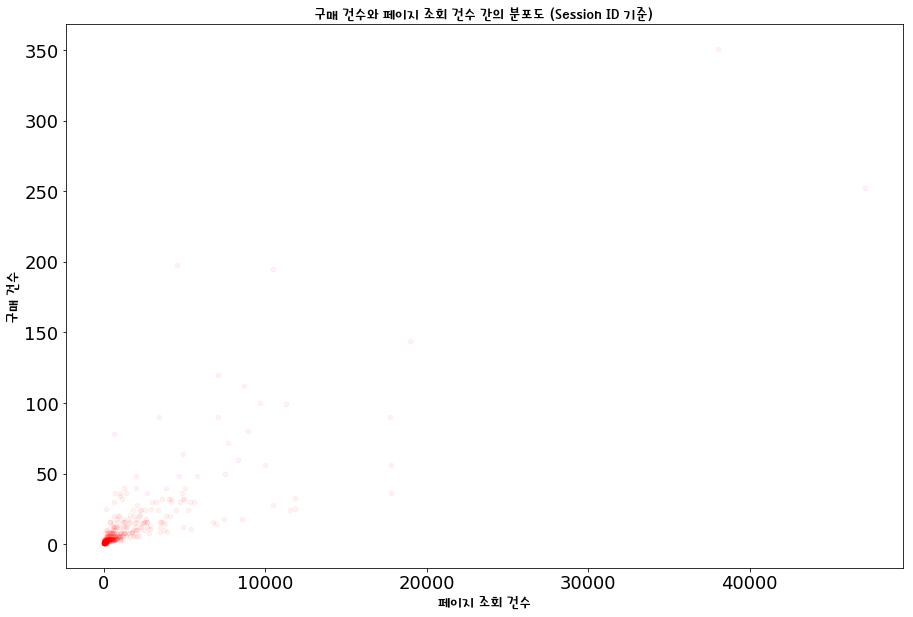

In [6]:
# 세션 ID별 구매 건수와 페이지 조회 건수 간의 분포
data = test.groupby('SESS_ID').agg({'TOT_PAG_VIEW_CT':'sum','PD_BUY_CT':'sum'})
data.plot(kind='scatter', x="TOT_PAG_VIEW_CT", y="PD_BUY_CT", alpha=0.05, color='red',
         figsize=(15,10))
plt.title('구매 건수와 페이지 조회 건수 간의 분포도 (Session ID 기준)', fontsize=30,fontproperties=prop)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('페이지 조회 건수', fontsize=18,fontproperties=prop)
plt.ylabel('구매 건수', fontsize=18,fontproperties=prop)
plt.show()

- 고객들의 구매건수와 조회 건수간의 상관관계는 보이지 않습니다.
- 즉, 페이지 조회를 많이 한다고 해서 구매를 하는 사람이라고 볼 수 없습니다.

# 2. 구매와 세션 접속시간 시각화
### 2-1. 세션별 세션 접속시간 변수 시각화



In [7]:
# 세션 시간에 있는 콤마를 제거하고 값이 없는 부분을 0으로 대체 합니다. 그런 후에 수치형으로 바꿔줍니다.
test['TOT_SESS_HR_V']=test['TOT_SESS_HR_V'].apply(lambda x: str(x).replace(',',''))
test['TOT_SESS_HR_V']=test['TOT_SESS_HR_V'].apply(lambda x: x.replace('nan','0'))
test['TOT_SESS_HR_V']=test['TOT_SESS_HR_V'].astype('int')

/home/heemok/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/heemok/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/heemok/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

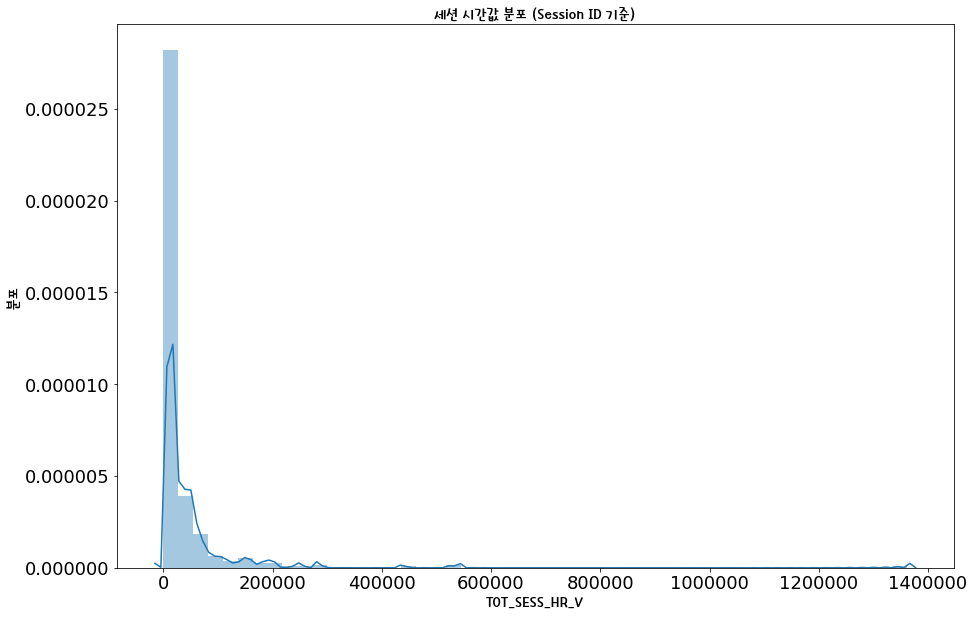

In [8]:
# 세션 ID 기준 세션 시간값 분포 
data = test.groupby('SESS_ID')['TOT_SESS_HR_V'].sum()
plt.figure(figsize = (15,10))
plt.title("세션 시간값 분포 (Session ID 기준)", fontsize=30,fontproperties=prop)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('세션 시간값', fontsize=18,fontproperties=prop)
plt.ylabel('분포', fontsize=18,fontproperties=prop)
sns.distplot(data)
plt.show()

- 고객들 사이에서 세션에 머무는 시간 또한 왼쪽에 쏠린 분포로 많은 시간 머무르지 않습니다.

### 2-2. 세션 접속 시간과 구매의 관계 파악

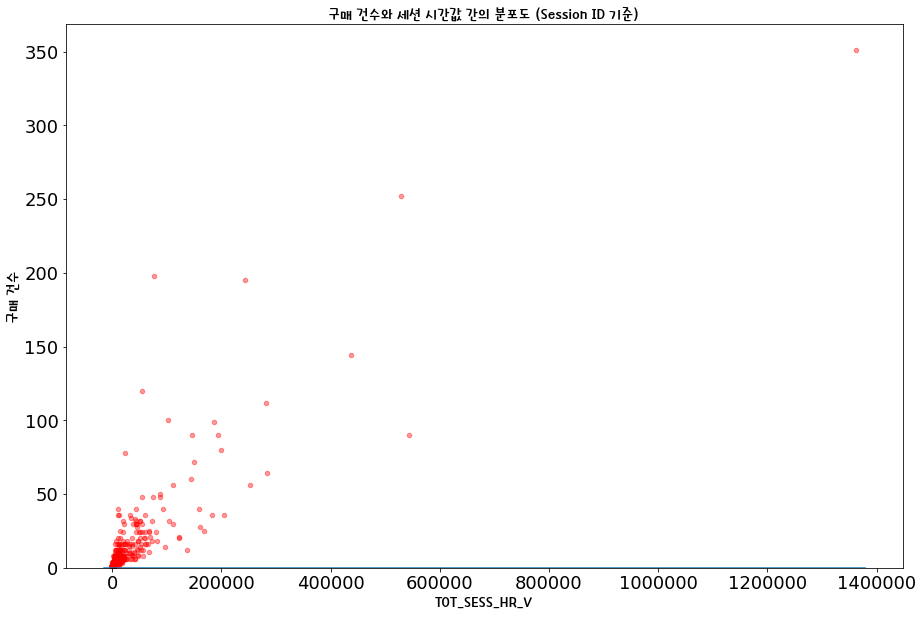

In [9]:
# 세션 ID 별 구매 건수와 세션 시간값 간의 분포
data = test.groupby('SESS_ID').agg({'TOT_SESS_HR_V':'sum','PD_BUY_CT':'sum'})
data.plot(kind='scatter', x='TOT_SESS_HR_V', y="PD_BUY_CT", alpha=0.4, color='red',
         figsize=(15,10))
plt.title('구매 건수와 세션 시간값 간의 분포도 (Session ID 기준)', fontsize=30,fontproperties=prop)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('세션 시간값', fontsize=18,fontproperties=prop)
plt.ylabel('구매 건수', fontsize=18,fontproperties=prop)
sns.distplot(data['TOT_SESS_HR_V'])
plt.show()

- 고객들의 구매건수와 접속 시간간의 상관관계는 보이지 않습니다.
- 즉, 접속 시간이 길다고 해서 구매를 하는 사람이라고 볼 수 없습니다.

In [10]:
# 세션 접속 시간을 그룹화(50, 100, 200, 이상)하여 범위에 따른 사용자들의 구매 차이를 비교합니다.
data = test.groupby('SESS_ID').agg({'TOT_SESS_HR_V':'sum','PD_BUY_CT':'sum'})
data['TOT_SESS_HR_V'] = pd.cut(data['TOT_SESS_HR_V'], [0, 50,100, 150, 200, 10e+10],
                              labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000+'])
data

,TOT_SESS_HR_V,PD_BUY_CT
SESS_ID,,
70889,20000+,3
170584,20000+,8
337984,20000+,3
553620,20000+,6
658123,20000+,1
719230,20000+,1
735671,20000+,2
753466,20000+,18
753683,20000+,99


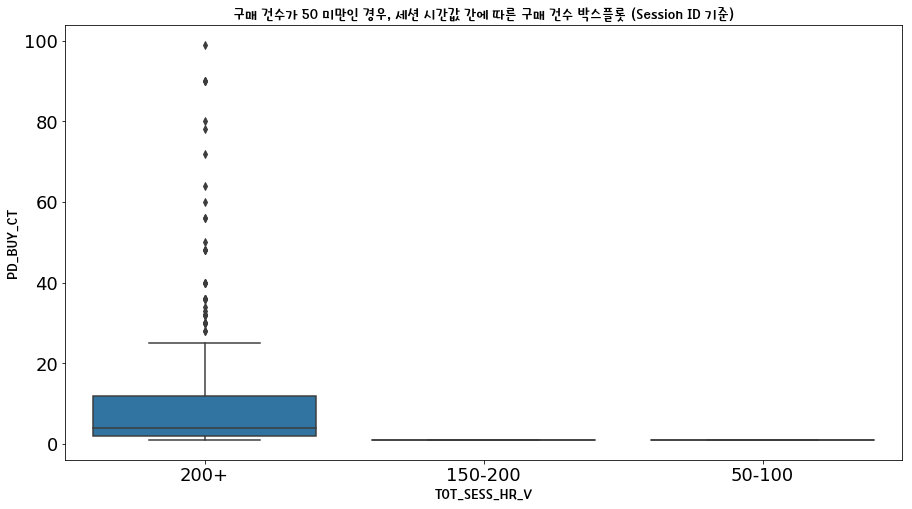

In [11]:
# 세션 ID별 세션 시간값 간에 따른 구매 건수 시각화
data = test.groupby('SESS_ID').agg({'TOT_SESS_HR_V':'sum','PD_BUY_CT':'sum'})
data['TOT_SESS_HR_V'] = pd.cut(data['TOT_SESS_HR_V'], [0, 50,100, 150, 200, 10e+10],
                              labels = ['0-50', '50-100', '100-150', '150-200', '200+'])
#data.loc[data['TOT_SESS_HR_V']<50,:]
plt.figure(figsize=(15,8))
plt.title("구매 건수가 50 미만인 경우, 세션 시간값 간에 따른 구매 건수 박스플롯 (Session ID 기준)", fontsize=30,fontproperties=prop)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('세션 시간값', fontsize=18,fontproperties=prop)
plt.ylabel('구매 건수', fontsize=18,fontproperties=prop)
data['TOT_SESS_HR_V']=data['TOT_SESS_HR_V'].astype('object')
sns.boxplot(x='TOT_SESS_HR_V', y='PD_BUY_CT', data=data.loc[data['PD_BUY_CT']<100,:])
plt.show()

- 세션 시간이 길다고 구매량이 많다는 관계는 아닌 것으로 위에서 본 시각화로 알 수 있었지만
- 그 중에서도 세션 시간이 많이 그룹이 대체로 구매 활동이 많은 것으로 파악됩니다.
- 하지만 이상치라고 볼 수 있는 사람들이 있습니다. -> 이들은 접속을 오래하고 구매량도 많지만 이들만 보고 일반화시킬 수 없습니다.

# 3. 구매와 접속 기기유형 시각화
### 3-1. 세션별 접속 기기유형 변수 시각화


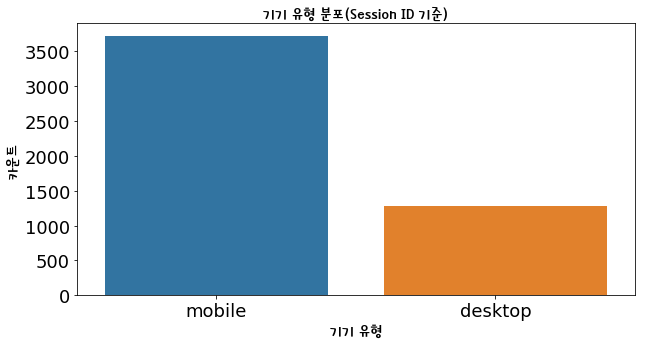

In [12]:
# 세션 ID 별 기기 유형 분포
plt.figure(figsize=(10,5))
sns.countplot(x='DVC_CTG_NM',data=test)
plt.title("기기 유형 분포(Session ID 기준)", fontsize=30,fontproperties=prop)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('기기 유형', fontsize=18,fontproperties=prop)
plt.ylabel('카운트', fontsize=18,fontproperties=prop)
plt.show()

- 기기 유형은 다음과 같이 세 종류입니다.
- 고객들은 다른 기기보다 모바일로 많이 접속합니다.


### 3-2. 접속 기기유형과 구매의 관계 파악




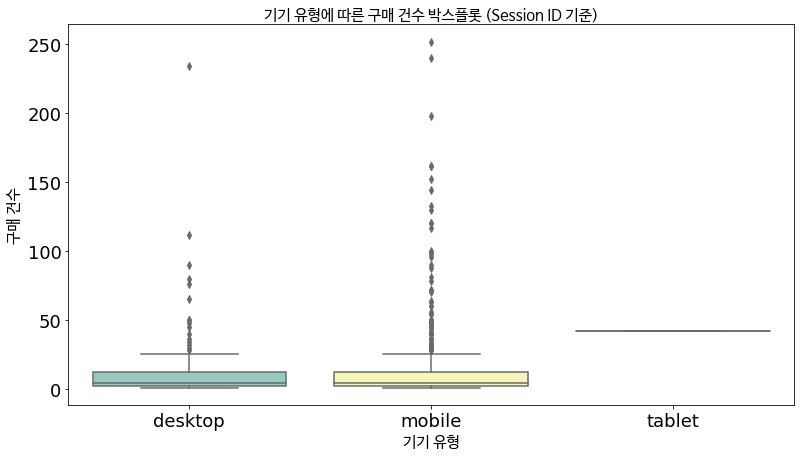

mobile 고객들의 평균 구매 건수는 12.327052 건, desktop 고객들의 평균 구매 건수는 12.229299 건, tablet 고객들의 평균 구매 건수는 42.000000 건이다


In [11]:
# 세션 ID 별 기기 유형에 따른 구매 건수 시각화
data = test.groupby(['DVC_CTG_NM','SESS_ID'])['PD_BUY_CT'].sum()
x=pd.DataFrame()
x['DVC_CTG_NM']=list(data.index.get_level_values('DVC_CTG_NM'))
x['PD_BUY_CT']=data.values
x=x.loc[x['PD_BUY_CT']<400]
plt.figure(figsize=(13,7))


plt.title("기기 유형에 따른 구매 건수 박스플롯 (Session ID 기준)", fontsize=30,fontproperties=prop)
sns.boxplot(x='DVC_CTG_NM' , y='PD_BUY_CT' ,data=x, palette="Set3")

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('기기 유형', fontsize=18,fontproperties=prop)
plt.ylabel('구매 건수', fontsize=18,fontproperties=prop)
plt.show()
print("mobile 고객들의 평균 구매 건수는 %f 건, desktop 고객들의 평균 구매 건수는 %f 건, tablet 고객들의 평균 구매 건수는 %f 건이다"\
      %(x[x['DVC_CTG_NM']=='mobile']['PD_BUY_CT'].mean(), x[x['DVC_CTG_NM']=='desktop']['PD_BUY_CT'].mean(),
       x[x['DVC_CTG_NM']=='tablet']['PD_BUY_CT'].mean()))

- 각 접속 기기 고객들의 평균 건수를 알 수 있다.
- 모바일 고객들이 가장 구매 건수가 높고, 그 다음으로 데스크탑 고객, 태블릿 고객 임을 알 수 있다.

### 3-3. 기기 유형에 따른 상품 소비 시각화

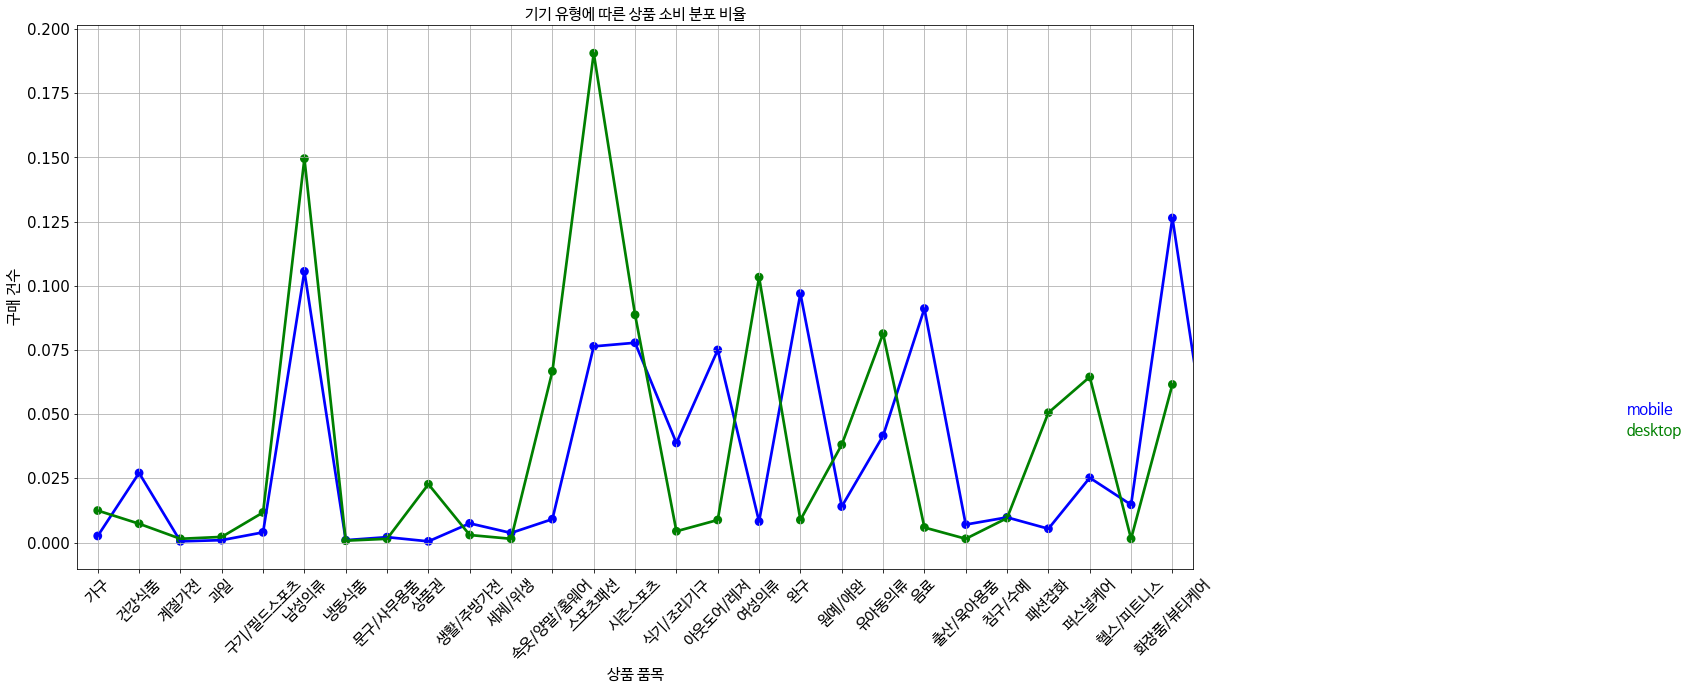

In [31]:
# 기기 유형별 상품 소비 분포
plt.figure(figsize =(20,10))
device_list = test['DVC_CTG_NM'].unique()
color_list = ['blue','green','red']

plt.title("기기 유형에 따른 상품 소비 분포 비율", fontsize=30, fontproperties=prop)
for i in range(len(device_list)):
    data_mini = test[test['DVC_CTG_NM'] == device_list[i]][['CLAC1_NM', 'PD_BUY_CT']].groupby('CLAC1_NM',as_index=False).sum()
    data_mini['PD_BUY_CT'] = data_mini['PD_BUY_CT']/data_mini['PD_BUY_CT'].sum()
    sns.pointplot(x='CLAC1_NM',y='PD_BUY_CT',data=data_mini, color=color_list[i],alpha=0.8, fontproperties=prop)
for i in range(len(device_list)):
    plt.text(37, 0.05-0.008*i, device_list[i],color=color_list[i],fontsize = 17,style = 'italic', fontproperties=prop)
    
plt.xticks(fontsize=12, rotation=45, fontproperties=prop)
plt.yticks(fontsize=15)
plt.xlabel('상품 품목', fontsize=18, fontproperties=prop)
plt.ylabel('구매 건수', fontsize=18, fontproperties=prop)
plt.grid()
plt.show()

# 4. 구매와 접속 지역 시각화
### 4-1. 세션별 접속 지역 변수 시각화



- 다음 시각화는 지역에 따른 차이입니다.
1. 먼저 어느 지역이 많이 접속하는 지 알 수 있습니다.
2. 어느 지역에서 구매가 많이 일어나는 지 알 수 있습니다.

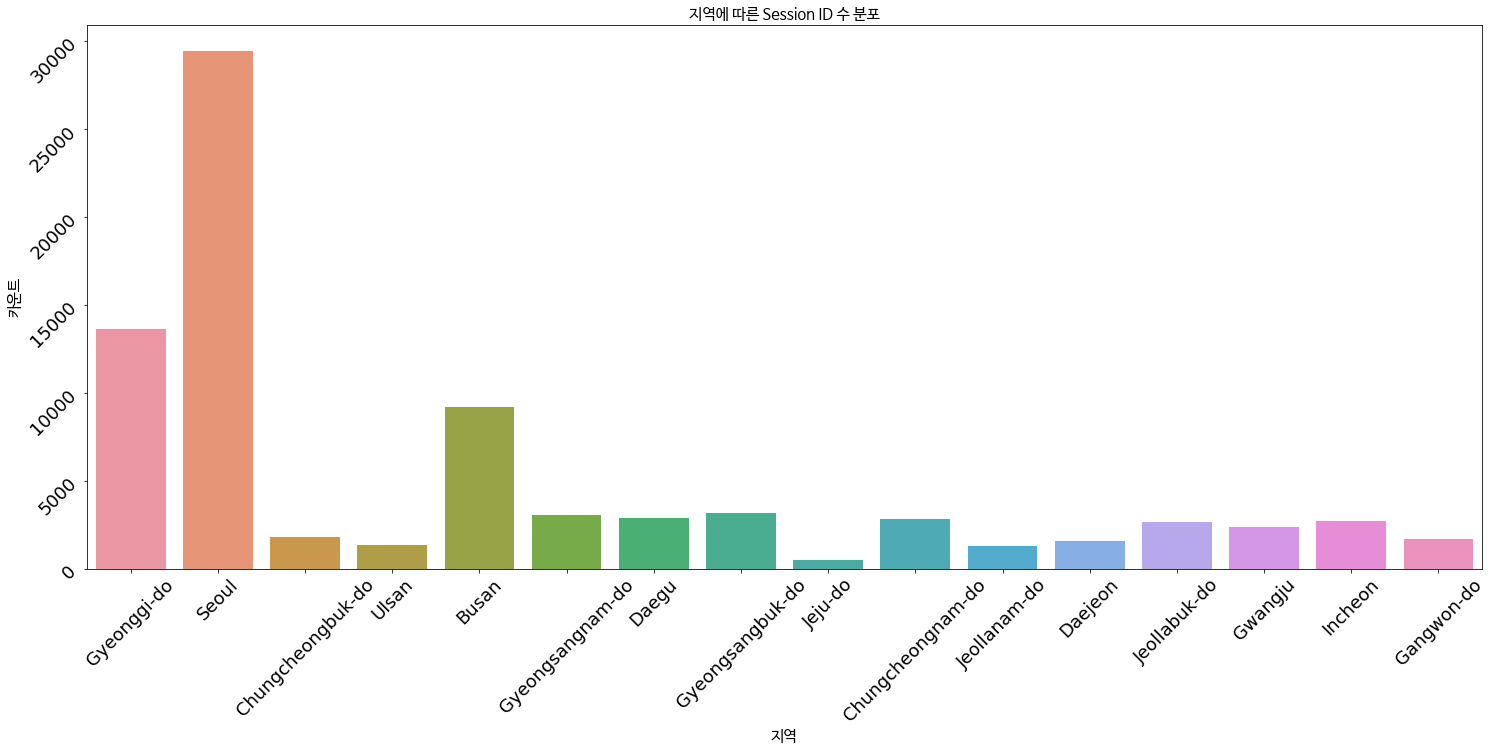

In [9]:
# 세션 ID별 지역 분포
data =test['ZON_NM']
plt.figure(figsize=(25,10))
sns.countplot(data)
plt.title("지역에 따른 Session ID 수 분포", fontsize=30,fontproperties=prop)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18, rotation=45)
plt.xlabel('지역', fontsize=18,fontproperties=prop)
plt.ylabel('카운트', fontsize=18,fontproperties=prop)
plt.show()

### 4-2. 접속 지역과 구매의 관계 파악

/home/heemok/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


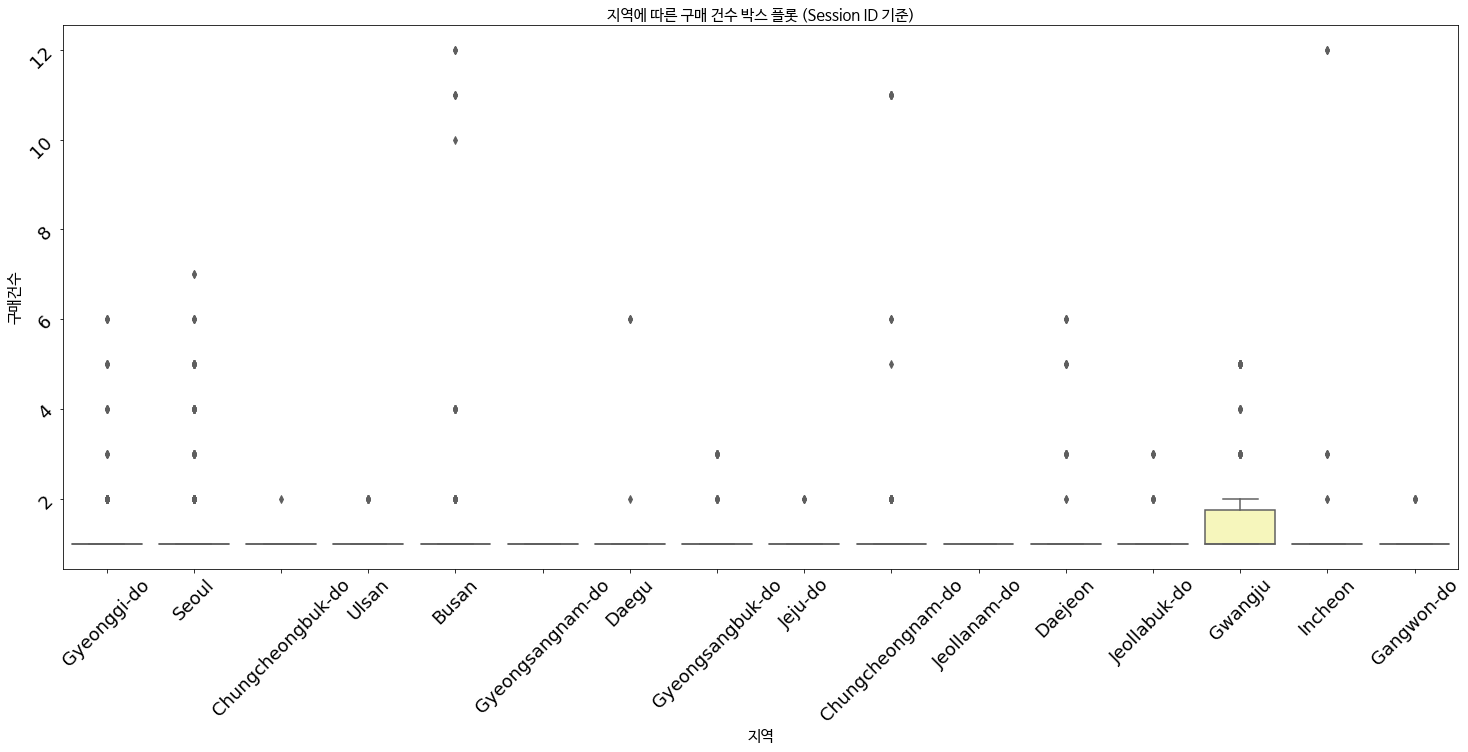

Gyeonggi-do 의 평균 구매 건수 : 1.077327 건
Seoul 의 평균 구매 건수 : 1.095238 건
Chungcheongbuk-do 의 평균 구매 건수 : 1.003378 건
Ulsan 의 평균 구매 건수 : 1.055000 건
Busan 의 평균 구매 건수 : 1.113729 건
Gyeongsangnam-do 의 평균 구매 건수 : 1.000000 건
Daegu 의 평균 구매 건수 : 1.051282 건
Gyeongsangbuk-do 의 평균 구매 건수 : 1.145299 건
Jeju-do 의 평균 구매 건수 : 1.210526 건
Chungcheongnam-do 의 평균 구매 건수 : 1.163995 건
Jeollanam-do 의 평균 구매 건수 : 1.000000 건
Daejeon 의 평균 구매 건수 : 1.478571 건
Jeollabuk-do 의 평균 구매 건수 : 1.049763 건
Gwangju 의 평균 구매 건수 : 1.690265 건
Incheon 의 평균 구매 건수 : 1.165385 건
Gangwon-do 의 평균 구매 건수 : 1.084337 건


In [12]:
# 세션 ID별 지역에 따른 구매 건수 시각화
data=test[['ZON_NM','PD_BUY_CT']]
plt.figure(figsize=(25,10))
plt.title("지역에 따른 구매 건수 박스 플롯 (Session ID 기준)", fontsize=30, fontproperties=prop)
data['PD_BUY_CT'] = data['PD_BUY_CT'].astype(float)

sns.boxplot(x='ZON_NM', y='PD_BUY_CT',
                 data=data, palette="Set3")
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18, rotation=45)
plt.xlabel('지역', fontsize=18, fontproperties=prop)
plt.ylabel('구매건수', fontsize=18, fontproperties=prop)
plt.show()
zon_list = data['ZON_NM'].unique()
for zon in zon_list:
    print("%s 의 평균 구매 건수 : %f 건" %(zon, data[data['ZON_NM']==zon]['PD_BUY_CT'].mean()))

/home/heemok/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


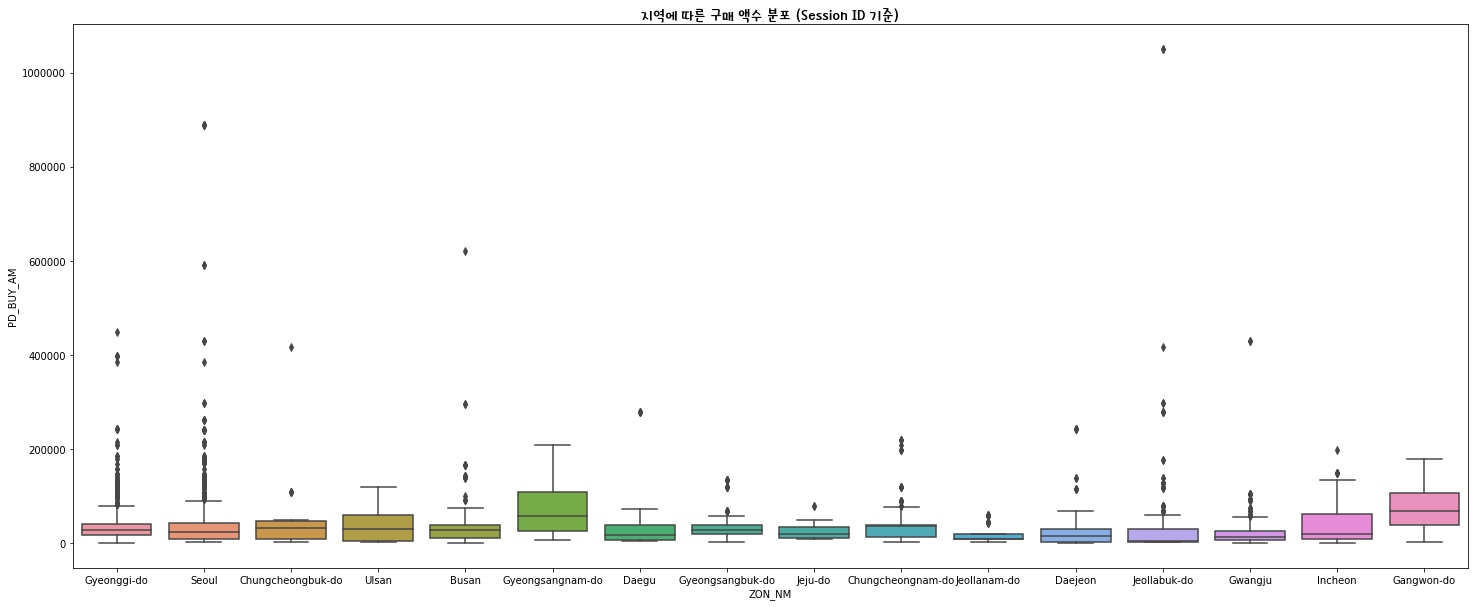

Gyeonggi-do 의 평균 구매 액수 : 37920.727273 원
Seoul 의 평균 구매 액수 : 38565.850829 원
Chungcheongbuk-do 의 평균 구매 액수 : 34596.012658 원
Ulsan 의 평균 구매 액수 : 37355.319149 원
Busan 의 평균 구매 액수 : 31294.548440 원
Gyeongsangnam-do 의 평균 구매 액수 : 68610.526316 원
Daegu 의 평균 구매 액수 : 35727.027027 원
Gyeongsangbuk-do 의 평균 구매 액수 : 36690.476190 원
Jeju-do 의 평균 구매 액수 : 27680.000000 원
Chungcheongnam-do 의 평균 구매 액수 : 40287.058824 원
Jeollanam-do 의 평균 구매 액수 : 18396.000000 원
Daejeon 의 평균 구매 액수 : 32221.052632 원
Jeollabuk-do 의 평균 구매 액수 : 34749.896552 원
Gwangju 의 평균 구매 액수 : 26796.030928 원
Incheon 의 평균 구매 액수 : 43427.727273 원
Gangwon-do 의 평균 구매 액수 : 76534.375000 원


In [9]:
# 세션 ID별 지역에 따른 구매 액수 분포
data=test[['ZON_NM','PD_BUY_AM']]
plt.figure(figsize=(25,10))
data['PD_BUY_AM'] = data['PD_BUY_AM'].astype(float)

sns.boxplot(x = 'ZON_NM', y = 'PD_BUY_AM', data=data)
plt.title("지역에 따른 구매 액수 분포 (Session ID 기준)", fontsize=15, fontproperties=prop)
plt.show()

zon_list = data['ZON_NM'].unique()
for zon in zon_list:
    print("%s 의 평균 구매 액수 : %f 원" %(zon, data[data['ZON_NM']==zon]['PD_BUY_AM'].mean()))

# 5. 데스크탑 유저의 특징 시각화


다음 시각화는 접속 기기 유형 중에 데스크탑으로 접속한 고객들에 대한 시각화입니다.
1. 데스크탑 유저들의 페이지 조회 특징
2. 데스크탑 유저들의 세션 접속 시간 특징
3. 데스크탑 유저들의 연령 특징
4. 데스크탑 유저들의 성별 특징
5. 데스크탑 유저들의 검색량 및 검색어 특징

### 5-1. 페이지 조회



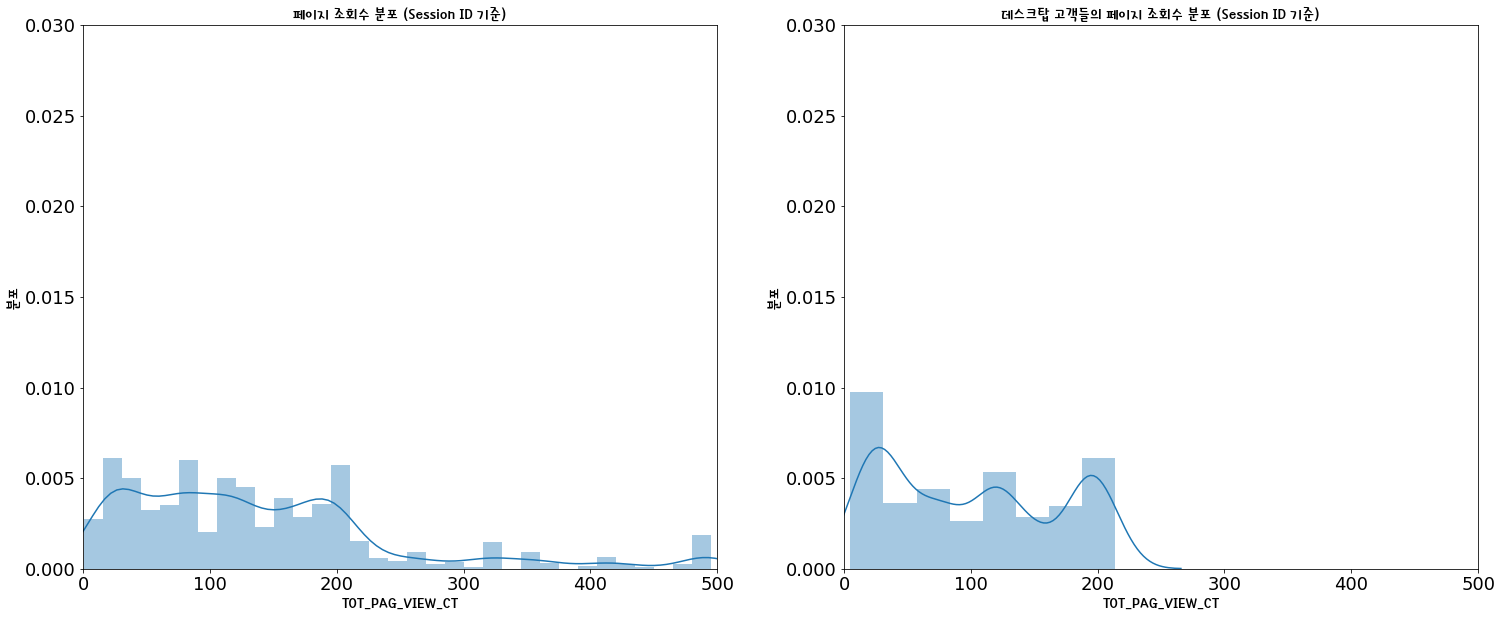

In [10]:
# 세션 ID별 페이지 조회수 분포와 데스크탑 고객들의 페이지 조회수 분포
f,ax = plt.subplots(1,2, figsize = (25,10))
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.xlabel('페이지 조회 건수', fontsize=18)
# plt.ylabel('분포', fontsize=18)

data = test['TOT_PAG_VIEW_CT'].dropna()
data[data>data.quantile(0.99)] = data.quantile(0.99)
ax[0].set_title("페이지 조회수 분포 (Session ID 기준)", fontsize=30, fontproperties=prop)
ax[0].set_xlim(0,500)
ax[0].set_ylim(0,0.03)
ax[0].set_xlabel("페이지 조회건수", fontsize=18, fontproperties=prop)
ax[0].set_ylabel("분포", fontsize=18, fontproperties=prop)
ax[0].tick_params(labelsize=18)

sns.distplot(data, ax=ax[0])

data = test[test['DVC_CTG_NM']=='desktop']['TOT_PAG_VIEW_CT'].dropna()
data[data>data.quantile(0.99)] = data.quantile(0.99)
ax[1].set_title("데스크탑 고객들의 페이지 조회수 분포 (Session ID 기준)", fontsize=30, fontproperties=prop)
ax[1].set_xlim(0,500)
ax[1].set_ylim(0,0.03)
ax[1].set_xlabel("페이지 조회건수", fontsize=18, fontproperties=prop)
ax[1].set_ylabel("분포", fontsize=18, fontproperties=prop)
ax[1].tick_params(labelsize=18)
sns.distplot(data, ax=ax[1])
plt.show()

### 5-2. 접속 시간


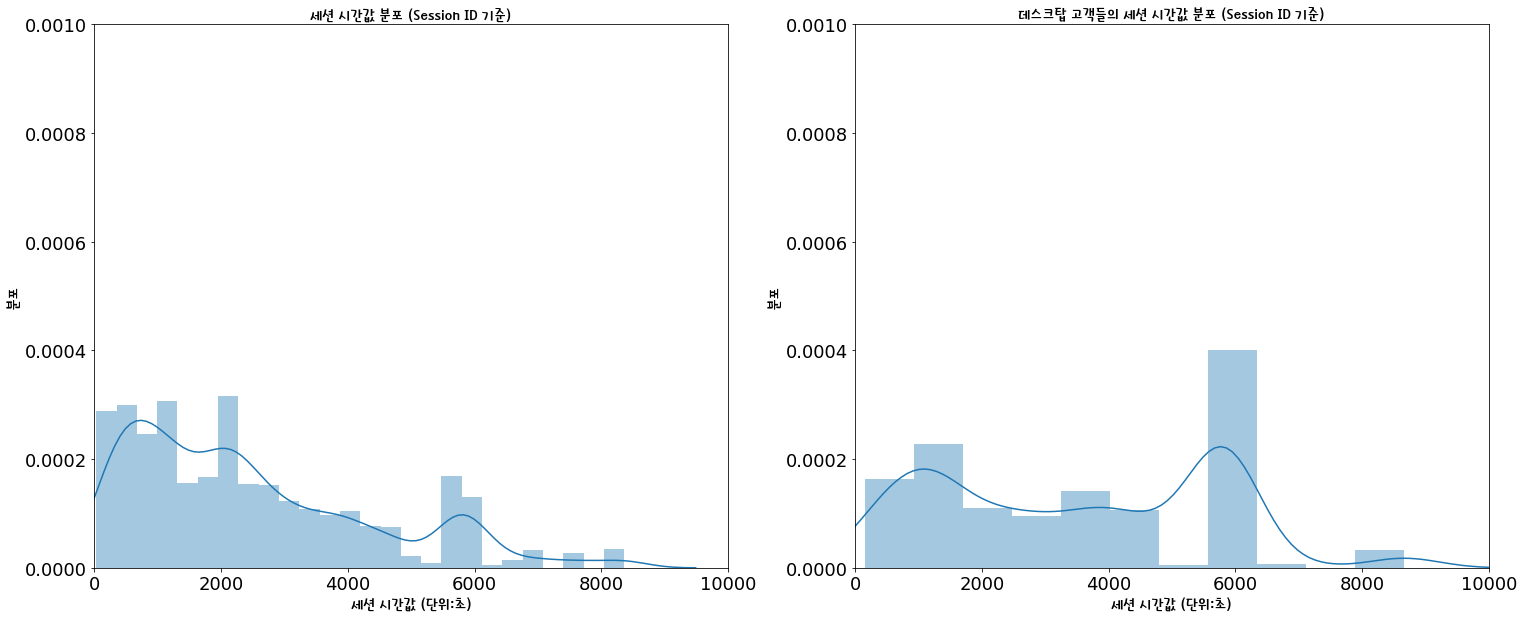

In [11]:
# 세션 ID별 세션 시간값 분포와 데스크탑 고객들의 세션 시간값 분포
f,ax = plt.subplots(1,2, figsize = (25,10))

data = test['TOT_SESS_HR_V'].dropna().apply(lambda x:int(str(x).replace('.','').replace(',','')))
data[data>data.quantile(0.99)] = data.quantile(0.99)
ax[0].set_title("세션 시간값 분포 (Session ID 기준)", fontsize=30, fontproperties=prop)
ax[0].set_xlim(0,10000)
ax[0].set_ylim(0,0.001)
sns.distplot(data, ax=ax[0])

data = test['TOT_SESS_HR_V'].dropna().apply(lambda x:int(str(x).replace('.','').replace(',','')))[test['DVC_CTG_NM']=='desktop']
data[data>data.quantile(0.99)] = data.quantile(0.99)
ax[1].set_title("데스크탑 고객들의 세션 시간값 분포 (Session ID 기준)", fontsize=30, fontproperties=prop)
ax[1].set_xlim(0,10000)
ax[1].set_ylim(0,0.001)
sns.distplot(data, ax=ax[1])

ax[0].set_xlabel("세션 시간값 (단위:초)", fontsize=18, fontproperties=prop)
ax[0].set_ylabel("분포", fontsize=18, fontproperties=prop)
ax[0].tick_params(labelsize=18)
ax[1].set_xlabel("세션 시간값 (단위:초)", fontsize=18, fontproperties=prop)
ax[1].set_ylabel("분포", fontsize=18, fontproperties=prop)
ax[1].tick_params(labelsize=18)
plt.show()


### 5-3. 연령



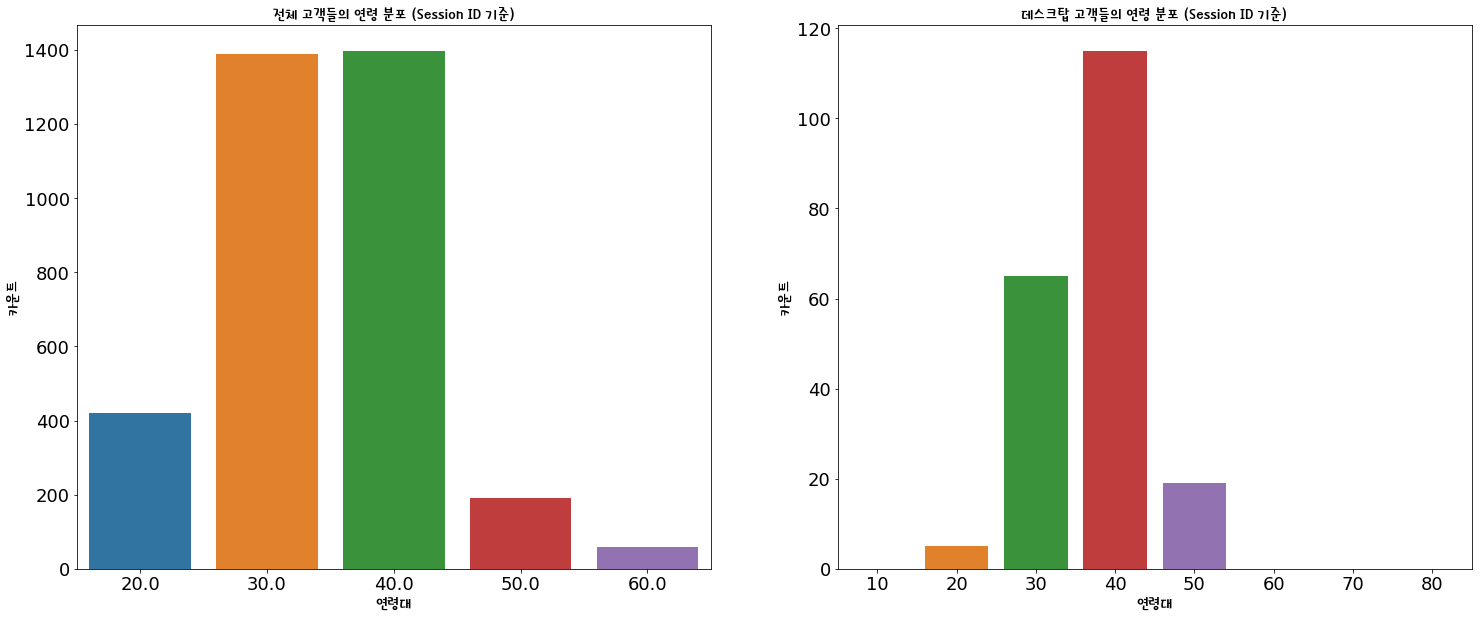

In [12]:
# 세션 ID별 고객들의 연령과 데스크탑 고객들의 연령
f, ax = plt.subplots(1,2, figsize=(25,10))
sns.countplot(test['CLNT_AGE'], ax=ax[0])
ax[0].set_title("전체 고객들의 연령 분포 (Session ID 기준)", fontsize=30, fontproperties=prop)

data = test[test['DVC_CTG_NM']=='desktop']
sns.countplot(data['CLNT_AGE'], ax=ax[1], order=[10,20,30,40,50,60,70,80])
ax[1].set_title("데스크탑 고객들의 연령 분포 (Session ID 기준)", fontsize=30, fontproperties=prop)

ax[0].set_xlabel("연령대", fontsize=18, fontproperties=prop)
ax[0].set_ylabel("카운트", fontsize=18, fontproperties=prop)
ax[0].tick_params(labelsize=18)
ax[1].set_xlabel("연령대", fontsize=18, fontproperties=prop)
ax[1].set_ylabel("카운트", fontsize=18, fontproperties=prop)
ax[1].tick_params(labelsize=18)
plt.show()

### 5-4. 성별



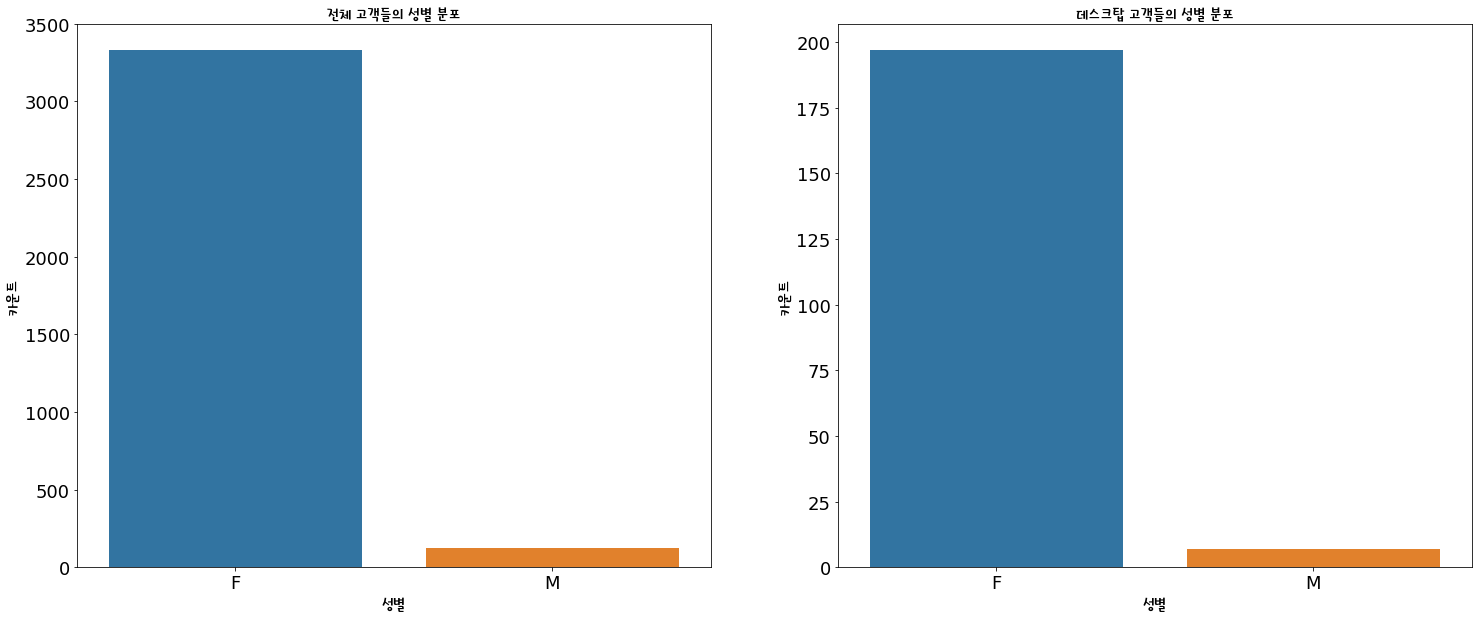

In [13]:
# 전체 고객의 성별과 데스크탑 고객들의 성별
f, ax = plt.subplots(1,2, figsize=(25,10))
sns.countplot(test['CLNT_GENDER'], ax=ax[0])
ax[0].set_title("전체 고객들의 성별 분포", fontsize=30, fontproperties=prop)

data = test[test['DVC_CTG_NM']=='desktop']
sns.countplot(data['CLNT_GENDER'], ax=ax[1], order = ['F', 'M'])
ax[1].set_title("데스크탑 고객들의 성별 분포", fontsize=30, fontproperties=prop)

ax[0].set_xlabel("성별", fontsize=18, fontproperties=prop)
ax[0].set_ylabel("카운트", fontsize=18, fontproperties=prop)
ax[0].tick_params(labelsize=18)
ax[1].set_xlabel("성별", fontsize=18, fontproperties=prop)
ax[1].set_ylabel("카운트", fontsize=18, fontproperties=prop)
ax[1].tick_params(labelsize=18)
plt.show()

### 5-5. 검색어

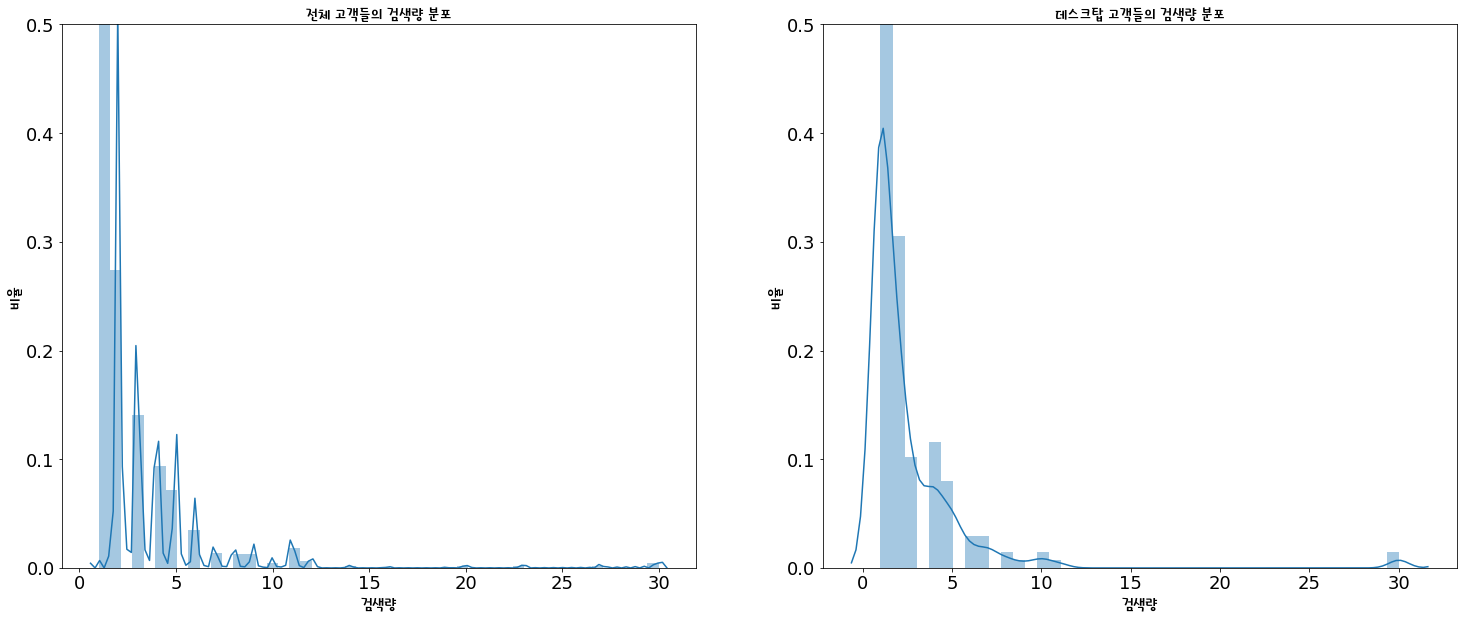

In [14]:
# 전체 고객들의 검색량과 데스크탑 고객들의 검색량
f, ax = plt.subplots(1,2, figsize=(25,10))
sns.distplot(test['SEARCH_CNT'][test['SEARCH_CNT']<60], ax=ax[0])
ax[0].set_title("전체 고객들의 검색량 분포", fontsize=30, fontproperties=prop)
ax[0].set_ylim(0,0.5)

data = test[test['DVC_CTG_NM']=='desktop'].dropna()
sns.distplot(data['SEARCH_CNT'][data['SEARCH_CNT']<60], ax=ax[1])
ax[1].set_title("데스크탑 고객들의 검색량 분포", fontsize=30, fontproperties=prop)
ax[1].set_ylim(0,0.5)

ax[0].set_xlabel("검색량", fontsize=18, fontproperties=prop)
ax[0].set_ylabel("비율", fontsize=18, fontproperties=prop)
ax[0].tick_params(labelsize=18)
ax[1].set_xlabel("검색량", fontsize=18, fontproperties=prop)
ax[1].set_ylabel("비율", fontsize=18, fontproperties=prop)
ax[1].tick_params(labelsize=18)
plt.show()

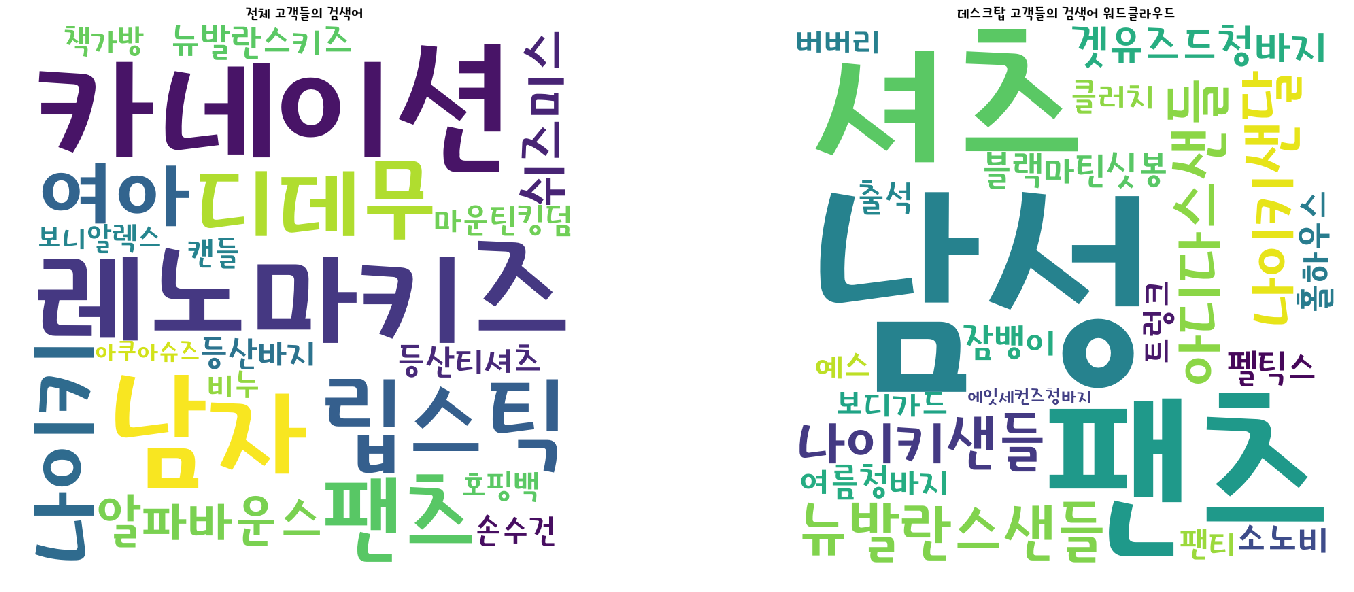

In [15]:
# 전체 고객들의 검색어 빈도와 데스크탑 고객들의 검색어 빈도
def getting_top_keywords(data, n):
    dic = dict(Counter(data))
    arr = np.array(list(dic.values()))
    top_idx = np.argsort(arr)[::-1][:n]
    return np.array(list(dic.keys()))[top_idx]

f, ax = plt.subplots(1, 2, figsize = (25,10))
n = 20

top_words = getting_top_keywords(test['KWD_NM'], n)
data = test['KWD_NM'][test['KWD_NM'].isin(top_words)]
wordcloud = WordCloud(font_path = 'HoonPinkpungchaR.otf' ,
                      width = 800, height = 800, max_words=100000,
                        background_color ='white',  collocations = False,
                        min_font_size = 10).generate(" ".join(data)) 
ax[0].imshow(wordcloud) 
ax[0].set_title("전체 고객들의 검색어", fontsize=30, fontproperties=prop)
ax[0].axis('off')


data = test[test['DVC_CTG_NM'] == 'desktop']
top_words = getting_top_keywords(data['KWD_NM'], n)
data = data['KWD_NM'][data['KWD_NM'].isin(top_words)]
wordcloud = WordCloud(font_path = 'HoonPinkpungchaR.otf' ,
                      width = 800, height = 800, max_words=100000,
                        background_color ='white', collocations = False,
                        min_font_size = 10).generate(" ".join(data)) 
ax[1].imshow(wordcloud) 
ax[1].set_title("데스크탑 고객들의 검색어 워드클라우드", fontsize=30, fontproperties=prop)
ax[1].axis('off')

plt.show()

# 6. 구매와 상품군 시각화

다음의 시각화는 상품에 따라 어떤 상품이 매출이 많이 일어나는 지 알 수 있습니다.

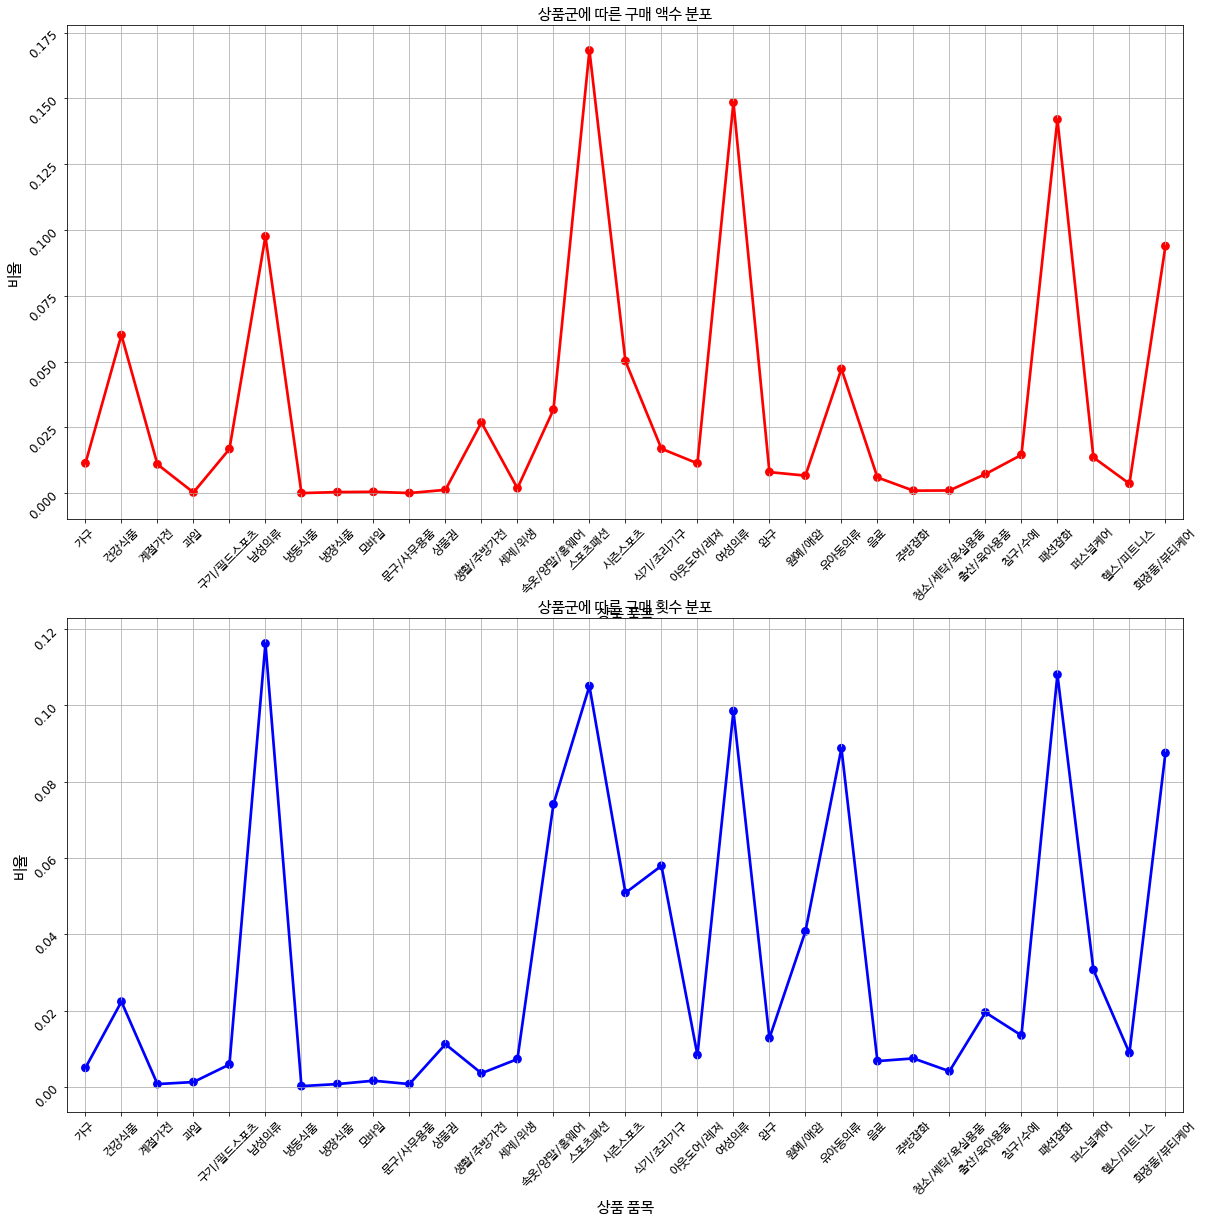

In [33]:
# 상품군에 따른 구매 액수 및 횟수 분포
f,ax = plt.subplots(2,1,figsize =(20,20))

ax[0].set_title("상품군에 따른 구매 액수 분포", fontsize=25, fontproperties=prop)
plt.setp(ax[0].get_xticklabels(), rotation=45, fontproperties=prop)
data_mini =  test[['CLAC1_NM', 'PD_BUY_AM']].groupby('CLAC1_NM', as_index=False).sum()
data_mini['PD_BUY_AM'] = data_mini['PD_BUY_AM']/data_mini['PD_BUY_AM'].sum()
sns.pointplot(x='CLAC1_NM',y='PD_BUY_AM',data=data_mini, color='red',alpha=0.8, ax=ax[0])
ax[0].grid()

ax[1].set_title("상품군에 따른 구매 횟수 분포", fontsize=25, fontproperties=prop)
plt.setp(ax[1].get_xticklabels(), rotation=4, fontsize=25, fontproperties=prop)
data_mini =  test[['CLAC1_NM', 'PD_BUY_CT']].groupby('CLAC1_NM', as_index=False).sum()
data_mini['PD_BUY_CT'] = data_mini['PD_BUY_CT']/data_mini['PD_BUY_CT'].sum()
sns.pointplot(x='CLAC1_NM',y='PD_BUY_CT',data=data_mini, color='blue',alpha=0.8, ax=ax[1], fontproperties=prop)
ax[1].grid()

ax[0].set_xlabel("상품 품목", fontsize=18, fontproperties=prop)
ax[0].set_ylabel("비율", fontsize=18, fontproperties=prop)
ax[0].tick_params(labelsize=12, rotation = 45)
ax[1].set_xlabel("상품 품목", fontsize=18, fontproperties=prop)
ax[1].set_ylabel("비율", fontsize=18, fontproperties=prop)
ax[1].tick_params(labelsize=12, rotation = 45)

plt.show()

/home/heemok/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


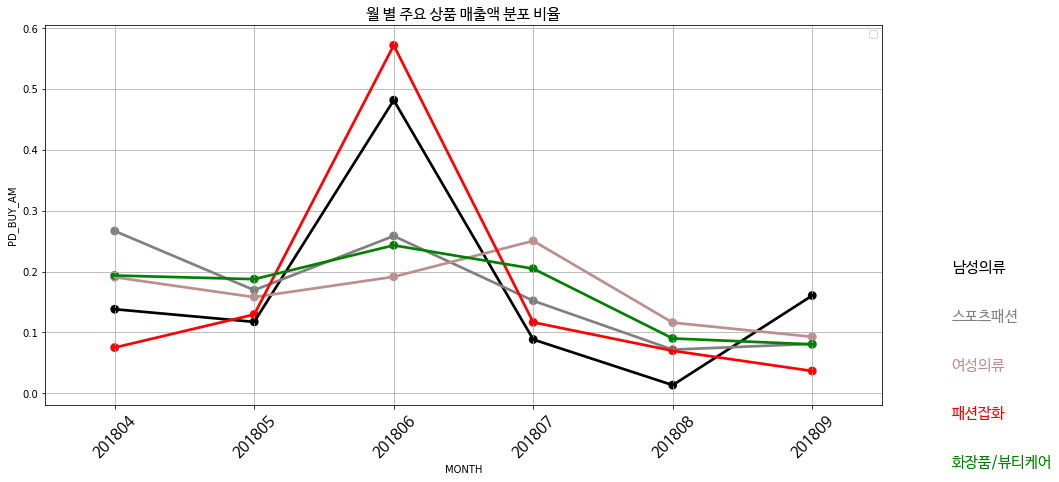

In [32]:
# 월 별 주요 상품 매출액 분포 비율
test['PD_BUY_AM'] = test['PD_BUY_AM'].apply(lambda x: int(x.replace(",","")))
test['MONTH'] = test['SESS_DT'].apply(lambda x : str(x)[:6])

f,ax1 = plt.subplots(figsize =(15, 7))
main_products = ['남성의류', '스포츠패션', '여성의류', '패션잡화', '화장품/뷰티케어']
color_list = ['black','gray','rosybrown','red','green','gold','olivedrab','palegreen','deepskyblue',
              'darkorchid','plum','pink', 'crimson', 'coral', 'yellow', 'indigo', 'orchid', 'pink'][:5]

plt.title("월 별 주요 상품 매출액 분포 비율", fontsize=30, fontproperties=prop)
plt.xticks(rotation=45, fontsize=16, fontproperties=prop)
for i in range(len(main_products)):
    data = test[test['CLAC1_NM'] == main_products[i]][['MONTH', 'PD_BUY_AM']].groupby('MONTH',as_index=False).sum()
    data['PD_BUY_AM'] = data['PD_BUY_AM']/data['PD_BUY_AM'].sum()
    sns.pointplot(x='MONTH',y='PD_BUY_AM',data=data, color=color_list[i],alpha=0.8)
for i in range(len(main_products)):
    plt.text(6, 0.2-0.08*i, main_products[i],color=color_list[i],fontsize = 1, fontproperties=prop)

plt.legend()
plt.grid()
plt.show()

In [21]:
# 전체 구매 건수 순위
test['PD_BUY_CT'] = test['PD_BUY_CT'].apply(lambda x :int(x.replace(',','')) if type(x) != int else x)
t = test.groupby("CLAC2_NM", as_index=False)['PD_BUY_CT'].sum()
t.sort_values('PD_BUY_CT', ascending=False)[:20]

,CLAC2_NM,PD_BUY_CT
19,남성의류하의,332
17,남성의류상의,305
45,수영/물놀이,287
36,밀폐/보관용기,266
75,유아동스포츠화,265
59,여성의류상의,252
98,패션액세서리,237
31,메이크업,225
48,스킨케어,180
67,여아의류상의,145
